# <span style = 'color: red'>**Práctica tres.** Aprendizaje de máquina. *Clusterización*</span>

# ***Parte uno.*** **Acondicionamiento de un conjunto de datos.**

## **Simón Cuartas Rendón**

En este *notebook* de Python se aborda el desarrollo de la **primera parte** de la *práctica tres* del curso de **Aprendizaje de Máquina**.

A continuación, se abren los paquetes que se usarán para dar solución al problema propuesto.

**Anotación**. Este *notebook* está disponible en línea para facilitar su revisión. Se puede acceder al repositorio de *GitHub* aquí, y en particular, a [este](https://github.com/scuartasr/aprendmaq_entregable_3) cuaderno [aquí](https://github.com/scuartasr/aprendmaq_entregable_3/blob/main/Cuadernos/01_acondicionamiento.ipynb).

In [1]:
#
# Apertura de paquetes básicos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Apertura de paquetes de preprocesamiento
import missingno as msno
from sklearn.preprocessing import StandardScaler, LabelEncoder

## <span style = 'color: cyan'>***1.1***</span> Lectura de la información

Para el desarrollo de este trabajo, se usará el marco de datos sobre países, disponible en *Kaggle* [aquí](https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data). En la descripción de este *set* de datos se anuncia que la base contiene información socioeconómica y de factores de salud para diversos países, y que require ser analizada para determinar en qué país puede ser más apropiado invertir recursos de una ONG de cara a fomentar el desarrollo y combatir la pobreza.

El repositorio contiene un diccionario de datos, indicando que se encuentran las siguientes características:


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-sgaa{background-color:#ecf4ff;border-color:inherit;color:#000000;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-sej6{border-color:inherit;font-family:"Lucida Console", Monaco, monospace !important;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-sgaa">Nombre</th>
    <th class="tg-sgaa">Traducción</th>
    <th class="tg-sgaa">Descripción</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-sej6">country</td>
    <td class="tg-0pky">País</td>
    <td class="tg-0pky">Nombre del país</td>
  </tr>
  <tr>
    <td class="tg-sej6">child_mort</td>
    <td class="tg-0pky">Mortalidad infantil</td>
    <td class="tg-0pky">Tasa de mortalidad infantil: número de niños menores de cinco años que fallecen por cada mil nacimientos vivos</td>
  </tr>
  <tr>
    <td class="tg-sej6">exports</td>
    <td class="tg-0pky">Exportaciones</td>
    <td class="tg-0pky">Exportación de bienes y servicios per capita. Indicado como porcentaje del PIB per capital del país</td>
  </tr>
  <tr>
    <td class="tg-sej6">health</td>
    <td class="tg-0pky">Salud</td>
    <td class="tg-0pky">Gasto nacional en salud per capita. Expresado como porcentaje del PIB per capita del país</td>
  </tr>
  <tr>
    <td class="tg-sej6">imports</td>
    <td class="tg-0pky">Importaciones</td>
    <td class="tg-0pky">Importación de bienes y servicios per capita. Expresado como porcentaje del PIB per capita del país</td>
  </tr>
  <tr>
    <td class="tg-sej6">income</td>
    <td class="tg-0pky">Ingreso</td>
    <td class="tg-0pky">Ingreso neto por persona</td>
  </tr>
  <tr>
    <td class="tg-sej6">inflation</td>
    <td class="tg-0pky">Inflación</td>
    <td class="tg-0pky">Medida de la tasa de crecimiento anual del PIB total</td>
  </tr>
  <tr>
    <td class="tg-sej6">life_expec</td>
    <td class="tg-0pky">Esperanza de vida</td>
    <td class="tg-0pky">Número promedio de años que un recién nacio viviría si se conversan los patrones de mortalidad vigentes en el país</td>
  </tr>
  <tr>
    <td class="tg-sej6">total_fer</td>
    <td class="tg-0pky">Fertilidad total</td>
    <td class="tg-0pky">Número de niños que nacerían por cada mujer si las tasas de fertilidad edad-específica se conservan en el país</td>
  </tr>
  <tr>
    <td class="tg-sej6">gdpp</td>
    <td class="tg-0pky">PIB per capital</td>
    <td class="tg-0pky">Producto interno bruto (PIB) per capita. Calculado como el PIB total dividido por el total de la población</td>
  </tr>
</tbody></table>

In [2]:
#
# Lectura de los datos
direc = '../Datos/Country-data.csv'
paises = pd.read_csv(direc, )

# Dimensionalidad
print(
    f'Los datos tienen {paises.shape[0]} filas y {paises.shape[1]} columnas.'
)

Los datos tienen 167 filas y 10 columnas.


Este marco de datos recoge información de diez países diferentes, y para cada uno de estos recoge nueve características, siendo la columna adicional la que etiqueta cada instancia con el nombre del país. A continuación, se pueden observar las primeras cinco observaciones del marco de datos:

In [3]:
#
# Primeras cinco observaciones
paises.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


De cara al propósito de esta base, el nombre del país recogido en `country` ***no*** debe ser una característica a tomar en cuenta durante el proceso de clusterización. Por ello, se la va a usar como un índice en adelante.

In [4]:
#
# Índice
paises.set_index('country', inplace=True)
paises.tail()
print(
    f'El marco de datos tiene {paises.shape[0]} filas y {paises.shape[1]} columnas.'
)

El marco de datos tiene 167 filas y 9 columnas.


Con esta acción, el marco de datos recoge como columnas solo aquellas características que realmente van a ser empleadas durante el proceso de entrenamiento del modelo. Ahora, se muestra la tipología de datos.

In [5]:
#
# Tipologías
paises.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


Como se observa, todas las características han sido leídas como variables cuantitativas, siendo `income` y `gdpp` las únicas de tipo entero (`int64`) y las restantes de tipo real o punto flotante (`float64`). De acuerdo con la descripción de las variables que se tiene en la tabla del comienzo, esto es coherente, por lo que no es necesario realizar reconversiones de datos.

## <span style = 'color: cyan'>***1.2***</span> Limpieza de datos

Ahora se realizará un proceso de limpieza de datos. Se comenzará validando si existen registros duplicados en el marco.

In [6]:
#
# Revisión de duplicados
duplicados = paises.duplicated().sum()
print(
    f'El marco de datos tiene {duplicados} registros duplicados.'
)


El marco de datos tiene 0 registros duplicados.


Y no es el caso, por lo que de momento se pueden conservar todas las observaciones. Con esto, se visualizará si existen observaciones nulas o vacías; si es el caso, se podrían observar barras grises con líneas horizontales en el medio que representan la ausencia de información.

<function matplotlib.pyplot.show(close=None, block=None)>

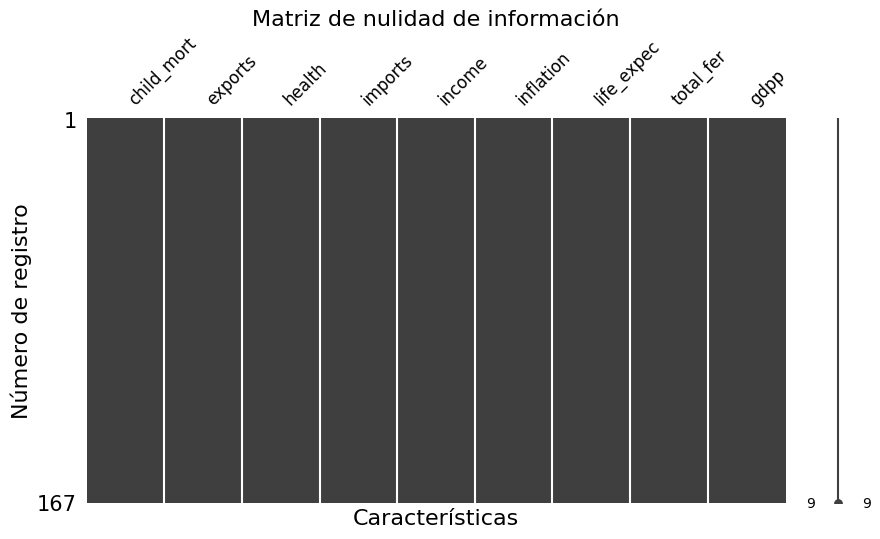

In [7]:
#
# Nulidad de información
msno.matrix(paises, figsize=(10, 5), fontsize=12, )
plt.title('Matriz de nulidad de información', fontsize=16, )
plt.ylabel('Número de registro', fontsize=16, )
plt.xlabel('Características', fontsize=16, )
plt.show

Como se puede observar, las columnas para cada una de las variables son continuas. Esto implica que el marco de datos carece de información vacía, por lo que no es necesario realizar acciones adicionales al respecto. De todos modos, se va a hacer una suma de valores nulos que debe dar cero en aras de verificar el resultado anterior:

In [8]:
#
# Número de celdas nulas
print(
    f'El marco de datos tiene {paises.isnull().sum().sum()} celdas nulas.'
)

El marco de datos tiene 0 celdas nulas.


## <span style = 'color: cyan'>***1.3***</span> Observaciones atípicas

A continuación, se identificarán las observaciones atípicas, entendiéndolas como aquellas que están 1.5 veces el rango intercuartílico por encima del tercer cuartil ($Q3$) o por debajo del primer cuartil ($Q1$). Estos son los valores que típicamente quedan representados como puntos en gráficos de cajas y bigotes. Se realizará el análisis detallando si existe un sesgo especial hacia la clase que marca el fraude, lo que indica una relevancia especial de la característica.

In [9]:
#

outlier_df = pd.DataFrame(index=paises.index)

for col in paises.select_dtypes(include=['number']).columns:
    q1 = paises[col].quantile(0.25)
    q3 = paises[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outlier_df[col + '_outlier'] = ((paises[col] < lower) | (paises[col] > upper))

In [10]:
#
# Sumarización de observaciones atípicas
outlier_summary = outlier_df.sum().reset_index()
outlier_summary.columns = ['Variable', 'Número de observaciones atípicas']
outlier_summary['Porcentaje'] = (outlier_summary['Número de observaciones atípicas'] / paises.shape[0]) * 100
outlier_summary = outlier_summary.sort_values(by='Número de observaciones atípicas', ascending=False)
print("Resumen de observaciones atípicas:")
print(outlier_summary) 

Resumen de observaciones atípicas:
             Variable  Número de observaciones atípicas  Porcentaje
8        gdpp_outlier                                25   14.970060
4      income_outlier                                 8    4.790419
1     exports_outlier                                 5    2.994012
5   inflation_outlier                                 5    2.994012
0  child_mort_outlier                                 4    2.395210
3     imports_outlier                                 4    2.395210
6  life_expec_outlier                                 3    1.796407
2      health_outlier                                 2    1.197605
7   total_fer_outlier                                 1    0.598802


Como se puede observar, todas las variables excepto una contienen pocas observaciones atípicas (por debajo de $5 \%$). La excepción está dada por `gdpp_outlier`. Con el siguiente gráfico de cajas y bigotes se puede observar si esto corresponde a países extremadamente pobres (zona baja del gráfico), extremadamente ricos (zona superior) o ambos.

/var/folders/sk/70417qyj4msbzpr87cqckzgm0000gn/T/ipykernel_15848/1330775678.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['${:,.0f}'.format(x) for x in y_ticks])


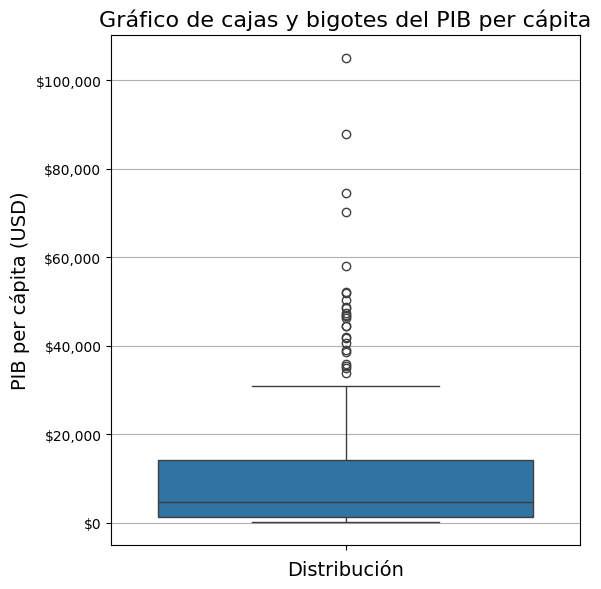

In [11]:
#
# Gráfico de cajas y bigotes para el GDP per cápita
plt.figure(figsize=(6, 6))
sns.boxplot(data=paises, y='gdpp')
plt.title('Gráfico de cajas y bigotes del PIB per cápita', fontsize=16)
plt.ylabel('PIB per cápita (USD)', fontsize=14)
plt.xlabel('Distribución', fontsize=14)

# Formatear las etiquetas del eje y con símbolo de dólar y comas
ax = plt.gca()
y_ticks = ax.get_yticks()
ax.set_yticklabels(['${:,.0f}'.format(x) for x in y_ticks])

plt.grid(axis='y')
plt.tight_layout()
plt.show()

Como se observa, todos estos datos atípicos se asocian a países ricos. No existen registros atípicos para países que puedan considerarse como *extremadamente pobres*. De hecho, un tema que llama la atención es que la distribución del PIB per capita está muy sesgado hacia valores bajos de esta variable, pues la mediana se acerca más hacia el $Q1$ y el bigote inferior es significativamente menos corte que el bigote superior, lo que quiere decir que es muy frecuente que los países tengan valores bajos de PIB per capita.

A continuación se listan estos países extremadamente ricos:

In [12]:
#
# Identificación de países con PIB per cápita atípico
q1_gdpp = paises['gdpp'].quantile(0.25)
q3_gdpp = paises['gdpp'].quantile(0.75)
iqr_gdpp = q3_gdpp - q1_gdpp
upper_gdpp = q3_gdpp + 1.5 * iqr_gdpp

paises_ricos_atipicos = paises[paises['gdpp'] > upper_gdpp]['gdpp'].sort_values(ascending=False)
print("Países con PIB per cápita atípicamente alto:")
print(paises_ricos_atipicos)

Países con PIB per cápita atípicamente alto:
country
Luxembourg              105000
Norway                   87800
Switzerland              74600
Qatar                    70300
Denmark                  58000
Sweden                   52100
Australia                51900
Netherlands              50300
Ireland                  48700
United States            48400
Canada                   47400
Austria                  46900
Singapore                46600
Finland                  46200
Japan                    44500
Belgium                  44400
Iceland                  41900
Germany                  41800
France                   40600
United Kingdom           38900
Kuwait                   38500
Italy                    35800
Brunei                   35300
United Arab Emirates     35000
New Zealand              33700
Name: gdpp, dtype: int64


Con esto presente, no vale la pena eliminar registros por ser atípicos, ya que de cara al uso que tendrá el modelo, esta información puede resultar valiosa para poder agrupar países con economías robustas que no requerirán de la ayuda financiera de la ONG.

## <span style = 'color: cyan'>***1.4***</span> Análisis de multicolinealidad

Se va a validar si existen variables que tengan correlaciones de Pearson fuertes ($| \rho | > 0.8$) para evitar que puedan, conjuntamente, sesgar las medidas de similaridad en los diferentes modelos que se entrenarán más adelante.

<Figure size 1000x800 with 0 Axes>

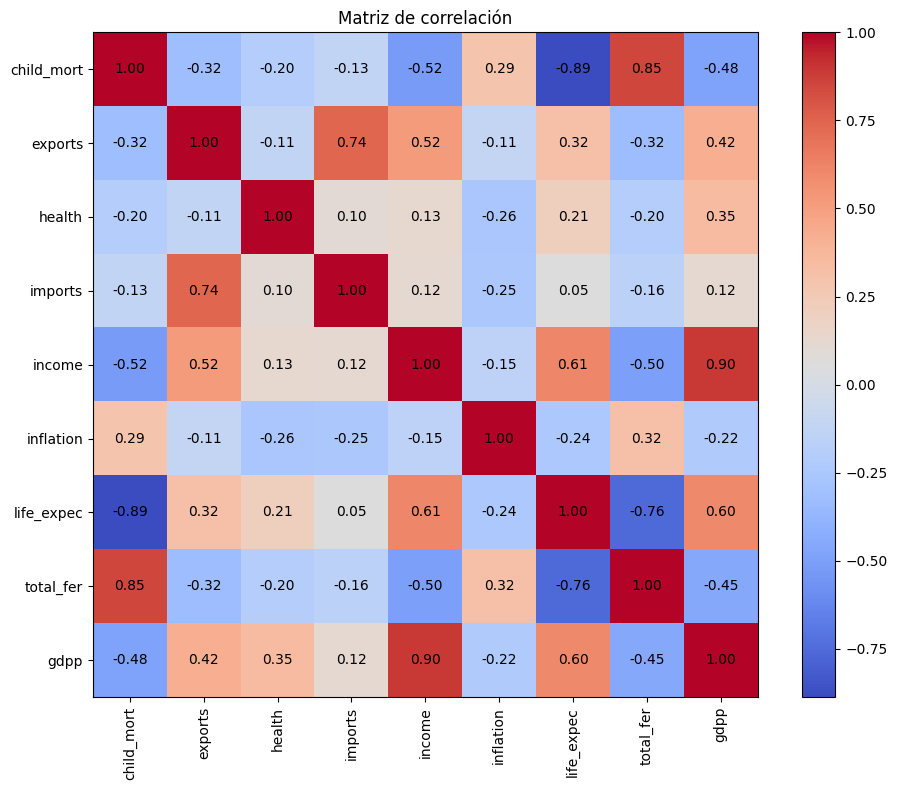

In [13]:
#
# Matriz de correlación que contenga el indicador de correlación de Pearson

plt.figure(figsize=(10, 8))
corr_matrix = paises.select_dtypes(include='number').corr()
plt.figure(figsize=(10,8))
plt.title("Matriz de correlación")
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.tight_layout()
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')
plt.show()

Como se observa, hay un trío de variables altamente correlacionadas, a saber: `child_mort`, `total_fer` y `life_expec`, pues en cada uno de los tres pares hay $|\rho\ > 0.75$. De cara al ajuste de los modelos, se va a eliminar el uso de la varibale `child_mort`, ya que es la que tiene mayores correlaciones de Pearson con las otras dos.

In [14]:
#
# Eliminación de variables altamente correlacionadas
paises.drop(columns=['child_mort'], inplace=True)
print(
    f'El marco de datos tiene {paises.shape[0]} filas y {paises.shape[1]} columnas después de eliminar la variable "child_mort".',
    f'El marco de datos conserva las siguientes variables: {list(paises.columns)}',
    sep='\n',
)

El marco de datos tiene 167 filas y 8 columnas después de eliminar la variable "child_mort".
El marco de datos conserva las siguientes variables: ['exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']


## <span style = 'color: cyan'>***1.5***</span> Normalización

Por último, se llevará a cabo un proceso de normalización, usando la técnica de ***estandarización***, que consiste en restarle a cada variable su media y dividir este resulado por su desviación estándar.

In [15]:
#
# Estandarización

scaler = StandardScaler()
paises_scaled = paises.copy()
paises_scaled[paises_scaled.select_dtypes(include='number').columns] = scaler.fit_transform(paises_scaled.select_dtypes(include='number'))
#
# Ver las primeras filas del marco de datos estandarizado
print("Primeras filas del marco de datos estandarizado:")
paises_scaled.head()


Primeras filas del marco de datos estandarizado:


,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,
Afghanistan,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
Albania,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
Algeria,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
Angola,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
Antigua and Barbuda,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


Este será el marco de datos con el que se estará trabajando. A continuación, se guardan los datos finales pre y postestandarización.

In [16]:
#
# Guardado de datos
output_dir = '../Datos/Preprocesamiento'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

paises.to_csv(os.path.join(output_dir, 'paises_original.csv.zip'), index=True, compression='zip', )
paises_scaled.to_csv(os.path.join(output_dir, 'paises_scaled.csv.zip'), index=True, compression='zip', )

In [17]:
#
# Limpieza de variables y del entorno
del direc, paises, paises_scaled, scaler, outlier_df, outlier_summary, corr_matrix, q1_gdpp, q3_gdpp, iqr_gdpp, upper_gdpp, paises_ricos_atipicos
import gc
gc.collect()

17427